### RNN (Recurrent Neural Network) is a type of neural network designed to handle sequential data by maintaining a "memory" of previous inputs. This makes RNNs particularly useful for tasks where the order or context of the data is important, such as in time series forecasting, natural language processing (NLP), speech recognition, and machine translation.
### all nlp problems can make use of rnn like translation of one language to another. another example is that suppose we have a sentence containing name osf the person, company's name and year, if we want to separate these as different fields like person's name, company's name and year then it can be achieved by making use of the rnn.
### it can also be used in sentiments analysis.
### sequence is necessary here. 
## issues with rnn:
### 1) suppose that our model is trained on the "how are you" text and we have another input text with some extension in text like "how are you and your brother", then rnn might make a problem here.
### 2) too much ccomputation is required here.

### Vanishing gradient problem in rnn: It occurs when gradients used to update the weights during backpropagation become extremely small, effectively preventing the network from learning.

### Types of RNN Architectures:
### 1) Many-to-Many: This is useful for tasks where both the input and output are sequences, such as in language translation (sequence of words as input, sequence of words as output).
### 2) Many-to-One: In this configuration, the RNN processes a sequence of inputs and produces a single output at the end, such as in sentiment analysis (sequence of words as input, sentiment as output).
### 3) One-to-Many: Here, a single input produces a sequence of outputs, like in music generation (a single theme producing a sequence of notes).
### 4) One-to-One: This is a simple case where both input and output are individual elements, but this isn't a common use of RNNs.

## LSTM: Long short term memory is a type of recurrent neural network (RNN) architecture designed to handle long-term dependencies in sequential data. It was introduced to address the shortcomings of standard RNNs, particularly the vanishing gradient problem, which makes it difficult for RNNs to learn and remember information over long sequences.
### Key Concepts of LSTM:
### 1) Memory Cells: LSTMs introduce memory cells that are responsible for maintaining information over long sequences. These cells have the ability to decide when to keep, update, or forget information through specialized gates.
### 2) Gates: The central innovation in LSTMs is the use of three types of gates that regulate the flow of information through the memory cell:
#### a) Forget Gate: Decides which information from the previous time step should be forgotten.
#### b) Input Gate: Determines what new information should be added to the memory cell.
#### c) Output Gate: Controls what information from the memory cell should be output at the current time step.
### 3) Cell State: The cell state acts as a conveyor belt that runs through the entire sequence. It allows information to flow through the network unchanged unless explicitly modified by the gates. This helps LSTMs retain long-term dependencies effectively.

## Working of lstm
### 1) Decides how much of the past it should remember decided by the sigmoid function. 
### 2) decides how much should this unit add to the current state. in this step we have sigmoid function that decides which values to let through (0 or 1) and other is tanh which gives the wieghtage to the values which are passed deciding their level of importance (-1 or 1).
### 3) decides what part of the current cell state makes it to the output

### here we will be working with the stock price predictions dataset to predict the prices

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# for model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [2]:
# load the tarining dataset
t_d_set=pd.read_csv("Google_Stock_Price_Train.csv")
t_d_set

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
# we will work only with the open values for our training purpose
training_dset=t_d_set.iloc[:, 1:2].values # here we have specified that we need all the rows and only 1 and 2 columns namely open and high

In [4]:
# now we need to scale the data to avoid outliers
sc= MinMaxScaler(feature_range=(0, 1))

# scale the training dataset
scalled_training_set=sc.fit_transform(training_dset)

In [5]:
# now we have to separate the x and y train values
X_train=[]
y_train=[]
# we will run our code with 60 time steps till 1258 that is the total size of the dataset, 60 is often taken in the lstm forecasting problems 
for i in range(60, 1258):
    # xtrain will contain values from 0 to 59 (i=60-60:i=60 --> 0 to 59)
    X_train.append(scalled_training_set[i-60:i, 0])
    # y train will contain (60 when xtrain is 0 to 59, similary if xtarin is 1 to 60 the ytrain will be 61)
    y_train.append(scalled_training_set[i, 0])
# conevrting xtrain and ytrain into np array
X_train, y_train=np.array(X_train), np.array(y_train)

# reshaping xtrain
# here x_train.reshape[0] ==> if you have 1,198 samples (because your loop runs from 60 to 1258), this value will be 1,198.
# and X_train.shape[1]--> each sample will consist of 60 consecutive time points from the dataset.
# and 1 meams we have made use of only one input sample that is Open balance
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [7]:
# model creation

# 1) initialize the model
sq=Sequential()

# 2) adding the lstm 
# with input layer
# here 50 units means that our lstm will have 50 memory cells
# When return_sequences=True, the LSTM layer will return the full sequence of outputs for each time step.
# Dropout randomly "drops" (i.e., ignores) 20% (0.2) of the neurons during training on each forward pass. This forces the model to become more robust, as it cannot rely on any one particular neuron during training.
# No need to specify an additional activation function for the LSTM layer: The LSTM already uses the sigmoid and tanh activation functions internally.
sq.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
sq.add(Dropout(0.2))

# adding more hidden layers
sq.add(LSTM(units=50, return_sequences=True))
sq.add(Dropout(0.2))

sq.add(LSTM(units=50, return_sequences=True))
sq.add(Dropout(0.2))

sq.add(LSTM(units=50))
sq.add(Dropout(0.2))

# now output dense neural network
sq.add(Dense(units=1))

c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# compiling the model
# here we have not used accuracy_metrics because we are dealing with the regression problem therefore, we do not need to make use of it
sq.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# now fit the data into the model
# A batch size of 32 means the model will look at 32 samples at a time before performing a gradient update.
sq.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - loss: 0.0873
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0072
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0057
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0061
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0050
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0048
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0053
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0043
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0046
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0044
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0038
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0055
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0039
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0037
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - 

### The model has been trained successfully

In [12]:
#now laoding the test dataset
test_dset=pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price=test_dset.iloc[:, 1:2].values


In [13]:
# getting the predicted stock price for the next year
# to gather all open prices of both the testing and the training dataset
dataset_total=pd.concat((t_d_set['Open'], test_dset['Open']), axis=0)

# to create the input data for the model.
inputs=dataset_total[len(dataset_total)-len(test_dset)-60:].values
# For instance, if len(dataset_total) is 1300 and len(test_dset) is 200, then:
# len(dataset_total) - len(test_dset) = 1300 - 200 = 1100
# The -60 ensures that we include 60 rows before the start of the test set.
# len(dataset_total) - len(test_dset) - 60 = 1100 - 60 = 1040

# The inputs are reshaped to be a 2D array with one column. This is necessary because the scaling function expects input in this shape.
inputs=inputs.reshape(-1, 1)

# The inputs are transformed using a scaler object (sc) that is standardscaller between 0 and 1
inputs=sc.transform(inputs)

X_test=[]

# This loop constructs X_test by taking 60 previous values as inputs for each prediction
for i in range(60, 80):
    # For each index from 60 to 79, it collects the previous 60 values from the scaled input
    X_test.append(inputs[i-60: i, 0])

X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# making predictions
predicted_stock_price=sq.predict(X_test)
# After predicting the scaled stock prices, this line uses the scaler (sc) to inverse-transform the predicted values back to their original scale (e.g., the actual stock price values). This is important for interpreting the predicted prices in a meaningful way
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


### Visualising graphically the predicted and the actual stock price

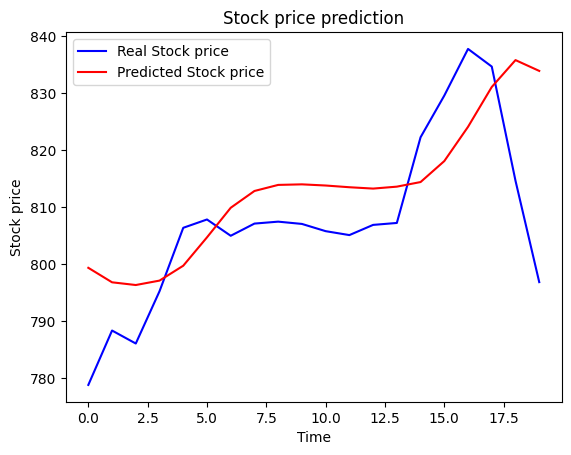

In [14]:
plt.plot(real_stock_price, color='blue', label='Real Stock price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock price')

plt.title("Stock price prediction")
plt.xlabel("Time")
plt.ylabel("Stock price")

plt.legend()
plt.show()

### result: the graph shows the variations between the actual and the predicted data points of stock price prediction dataset